In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:

# Data
data = {
    'Number UEs str': [16, 32, 64, 128, 256, 512, 1024],
    'Avg CPU (millicores)': [0.00073 * 1000, 0.00075 * 1000, 0.00085 * 1000, 0.00091 * 1000, 0.00097 * 1000, 0.00103 * 1000, 0.00109 * 1000],
    'Std Dev CPU': [0.00026 * 1000, 0.00019 * 1000, 0.00034 * 1000, 0.00027 * 1000, 0.00039 * 1000, 0.00041 * 1000, 0.00038 * 1000],
    'Avg Memory (MB)': [6.68, 6.69, 7.25, 7.49, 7.53, 7.57, 7.61],
    'Std Dev Memory': [0.47, 0.4, 0.51, 0.6, 0.53, 0.61, 0.46],
    'Time (ms)': [0.024024069 * 1000, 0.031508116 * 1000, 0.040097032 * 1000, 0.062052087 * 1000, 0.095843842 * 1000, 0.147976187 * 1000, 0.23256436 * 1000],
    'Std Dev Time': [0.01 * 1000, 0.015 * 1000, 0.016 * 1000, 0.028 * 1000, 0.043 * 1000, 0.059 * 1000, 0.093 * 1000],
    'Time by UE (ms)': [1.501504, 0.984629, 0.626516, 0.484782, 0.37439, 0.289016, 0.227114],
    'Std Time by UE (ms)': [0.625, 0.46875, 0.25, 0.21875, 0.16797, 0.11523, 0.09082]
}

df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="darkgrid")

CPU Fit: 0.000*x^2 + 0.209*x + 0.464
Memory Fit: -0.374*x^2 + 2.151*x + 4.526


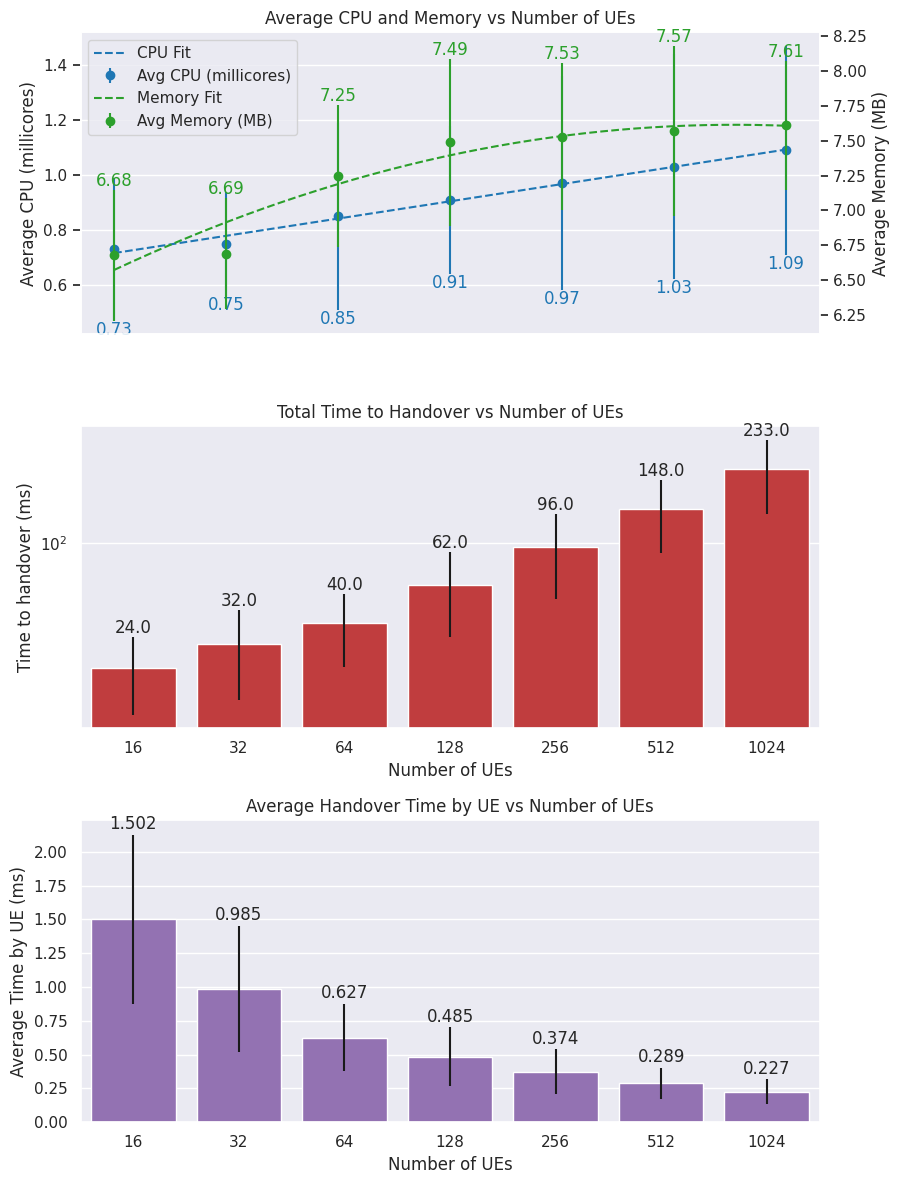

In [18]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(9, 12), sharex=False)

# Line plot for Avg. CPU and Avg. Memory vs Number UEs str with two y-axes
ax1 = axs[0]
ax2 = ax1.twinx()

ax1.errorbar(df['Number UEs number'], df['Avg CPU (millicores)'], yerr=df['Std Dev CPU'], fmt='o', label='Avg CPU (millicores)', color='tab:blue')
ax2.errorbar(df['Number UEs number'], df['Avg Memory (MB)'], yerr=df['Std Dev Memory'], fmt='o', label='Avg Memory (MB)', color='tab:green')

# Fit polynomial curve
cpu_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg CPU (millicores)'], 2)
memory_poly_coeff = np.polyfit(np.log10(df['Number UEs number']), df['Avg Memory (MB)'], 2)

# Generate x values for plotting the polynomial curve
x_values = np.linspace(min(df['Number UEs number']), max(df['Number UEs number']), 500)
log_x_values = np.log10(x_values)

# Calculate y values for the polynomial curve
cpu_poly_y = np.polyval(cpu_poly_coeff, log_x_values)
memory_poly_y = np.polyval(memory_poly_coeff, log_x_values)

# Print fit equations
cpu_fit_eq = f"CPU Fit: {cpu_poly_coeff[0]:.3f}*x^2 + {cpu_poly_coeff[1]:.3f}*x + {cpu_poly_coeff[2]:.3f}"
memory_fit_eq = f"Memory Fit: {memory_poly_coeff[0]:.3f}*x^2 + {memory_poly_coeff[1]:.3f}*x + {memory_poly_coeff[2]:.3f}"

print(cpu_fit_eq)
print(memory_fit_eq)

ax1.plot(x_values, cpu_poly_y, '--', color='tab:blue', label='CPU Fit')
ax2.plot(x_values, memory_poly_y, '--', color='tab:green', label='Memory Fit')

ax1.set_title('Average CPU and Memory vs Number of UEs')
ax1.set_xscale('log')
ax1.set_ylabel('Average CPU (millicores)')
ax2.set_ylabel('Average Memory (MB)')

# Annotate the values for Avg. CPU
for i, v in enumerate(df['Avg CPU (millicores)']):
    ax1.annotate(str(round(v, 2)), (df['Number UEs number'][i], v - df['Std Dev CPU'][i] ), ha='center', va='top', color='tab:blue')

# Annotate the values for Avg. Memory
for i, v in enumerate(df['Avg Memory (MB)']):
    ax2.annotate(str(round(v, 2)), (df['Number UEs number'][i], v + df['Std Dev Memory'][i] ), ha='center', va='bottom', color='tab:green')

# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)

# Remove x ticks
ax1.set_xticks([])
ax2.set_xticks([])

# Add legends
# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs number', y='Time (ms)', yerr=df['Std Dev Time'], data=df, ax=axs[1], color='tab:red')
axs[1].set_title('Total Time to Handover vs Number of UEs')
axs[1].set_xlabel('Number of UEs')
axs[1].set_ylabel('Time to handover (ms)')
axs[1].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time (ms)']):
    axs[1].annotate(str(round(v, 0)), (i, v + df['Std Dev Time'][i] + 0.01), ha='center', va='bottom')

# Bar plot for Time by UE vs Number UEs str
sns.barplot(x='Number UEs number', y='Time by UE (ms)', yerr=df['Std Time by UE (ms)'], data=df, ax=axs[2], color='tab:purple')
axs[2].set_title('Average Handover Time by UE vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Average Time by UE (ms)')

# Annotate the values of each bar
for i, v in enumerate(df['Time by UE (ms)']):
    axs[2].annotate(str(round(v, 3)), (i, v + df['Std Time by UE (ms)'][i] + 0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-handover.pdf', bbox_inches='tight')
plt.savefig('out/xApp-handover.png', dpi=300, bbox_inches='tight')
plt.show()